# Exploratory Data Analysis

In [24]:
# Dependencies

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


### Read Merged Bike Data and Weather Data CSV

In [25]:
# Set Filepath for Merged Data CSV

filepath = Path('../output/merged_weather_bike_data.csv')

# Read Chicago BikeShare Weather CSV Data

complete_bike_weather_data = pd.read_csv(filepath)

display(complete_bike_weather_data)

# segment data by year

year_data_2020 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2020, :]
year_data_2021 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2021, :]
year_data_2022 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2022, :]
year_data_2023 = complete_bike_weather_data.loc[complete_bike_weather_data['start_year'] == 2023, :]


,ride_id,started_at,start_day,start_hour,start_hour1,start_year,trip_length,start_station_name,member_casual,rideable_type,...,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0.0,0,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,...,2.77,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0.0,0,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,...,2.77,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0.0,0,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,...,2.77,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0.0,0,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,...,2.77,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0.0,0,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,...,2.77,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636880,23DF3FE6FAC4230D,2023-11-30 22:01:48,2023-11-30,23.0,22,2023,0 days 00:05:06,Clark St & Armitage Ave,casual,electric_bike,...,6.64,7.81,1012,92,4.92,183,100,500,Rain,light rain
9636881,53B0E31FD5DFCCEE,2023-11-30 22:16:03,2023-11-30,23.0,22,2023,0 days 00:22:25,Clark St & Armitage Ave,member,electric_bike,...,6.64,7.81,1012,92,4.92,183,100,500,Rain,light rain
9636882,8301A5F56705814A,2023-11-30 22:22:55,2023-11-30,23.0,22,2023,0 days 00:14:09,Wentworth Ave & Cermak Rd*,casual,electric_bike,...,6.64,7.81,1012,92,4.92,183,100,500,Rain,light rain
9636883,AE2CEF06C880E36E,2023-11-30 22:36:06,2023-11-30,23.0,22,2023,0 days 00:14:57,Wells St & Polk St,casual,electric_bike,...,6.64,7.81,1012,92,4.92,183,100,500,Rain,light rain


### Read Weather data to use as control

In [26]:
# Set Filepath for Merged Data CSV

weather_filepath = Path('../data/chicago_weather_data_2020_2023_Celcius.csv')

# Read Weather CSV Data

weather_data = pd.read_csv(weather_filepath)

weather_data

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1577836800,2020-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.08,10000.0,-5.63,-9.08,...,0.00,NaN,NaN,NaN,NaN,95,804,Clouds,overcast clouds,04n
1,1577840400,2020-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.99,10000.0,-5.23,-8.99,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,1577844000,2020-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.87,10000.0,-4.96,-8.87,...,0.00,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1577847600,2020-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-1.90,10000.0,-4.55,-8.90,...,0.00,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1577851200,2020-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,-2.18,10000.0,-4.67,-9.18,...,0.00,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37238,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,600,Snow,light snow,13d
37239,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,701,Mist,mist,50d
37240,1704060000,2023-12-31 22:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.77,4828.0,-1.15,-4.38,...,7.15,0.25,NaN,NaN,NaN,100,500,Rain,light rain,10d
37241,1704063600,2023-12-31 23:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,0.43,6437.0,-1.17,-4.81,...,7.60,NaN,NaN,0.11,NaN,100,600,Snow,light snow,13n


## Usage Trends:
### 1.1. How does the total number of rides vary under different weather conditions (e.g., clear, rainy,snowy)?     (Sean)

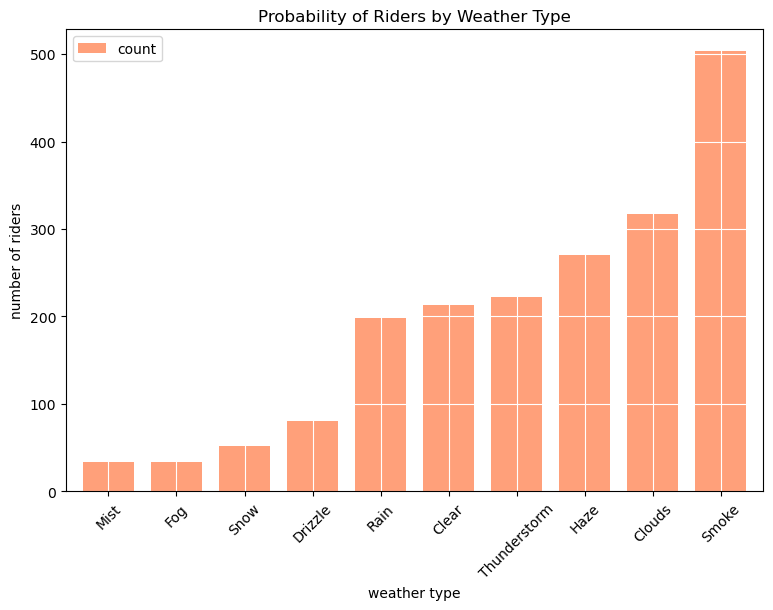

In [27]:
# Define Function for Ride by Weather Calculation consider Weather Probability Bias

def rides_by_weather(x):

    # Value Count Ride Share Data by Weather Type

    rides_by_weather = x['weather_main'].value_counts()

    # Weather Data Weather Type Baseline Probability

    weather_occurrences = weather_data['weather_main'].value_counts()
    total_weather_samples = weather_occurrences.sum()
    weather_probabilities = weather_occurrences / total_weather_samples

    # Calculate conditional probability of riding given weather (P(ride | weather))

    conditional_rider_probabilities = rides_by_weather / weather_occurrences
    conditional_rider_probabilities = conditional_rider_probabilities.sort_values()

    # Remove Bad Data and Display Data

    conditional_rider_probabilities = conditional_rider_probabilities.dropna(how='any')
    
    # display(pd.DataFrame(conditional_rider_probabilities))
    
    return conditional_rider_probabilities

def display_bar(x, y):
    
    # Combine data into a single DataFrame
    
    combined_df = pd.DataFrame(x)
    
    # Display and format as Chart

    combined_df.plot(kind='bar', figsize=(9,6), width=0.75, color = ['lightsalmon', 'silver', 'darkorange', 'grey'])
    plt.title(f'Probability of Riders by Weather Type{y}')
    plt.xlabel('weather type')
    plt.ylabel('number of riders')
    plt.xticks(rotation=45)
    plt.grid(color='white')
    
    plt.savefig(f'../output/Probability of Riders by Weather Type{y}')
    
    plt.show()


# Calculate and Display Rider Probability by Weather Type

display_bar(rides_by_weather(complete_bike_weather_data),"")


#### Analysis
In this chart, we can see the average number of rides taken during different weather conditions, we've adjusted the sampled probabilities to account for the probabilities of different weather types occurring within Chicago. To calculate this, we divided the total rides during each weather condition by the number of times that weather was recorded within the 4 years of data we had. The data highlights that "Cloudy" and interestingly "Smoke" weather seem to showcase the highest average bike usage (~32-34 rides per instance) while "Clear" weather follows with around 26.94. Rides drop significantly during rain and snow, indicating less rider activity in adverse conditions. This adjustment removes bias from how often certain weather occurs, giving a clearer view of rider behavior. 

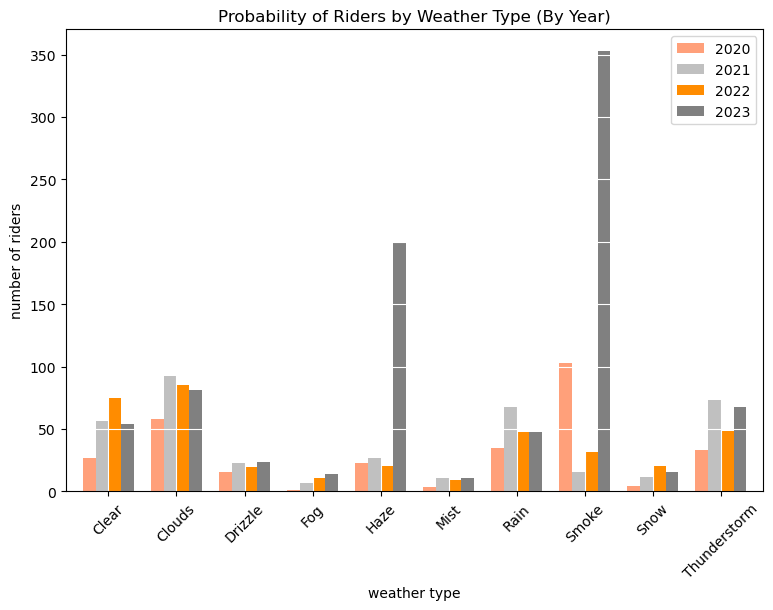

In [28]:
# Define loop Lists

years = [2020, 2021, 2022, 2023]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022, year_data_2023] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Year)")

#### Analysis
Breaking down the data year by year showed some really interesting trends in bike ridership across different weather conditions. While our earlier analysis looked at the entire dataset as a whole, this approach uncovered patterns that were hidden in the aggregate. For example, in 2023, weather types like "Smoke" and "Haze" had significantly higher probabilities of rides, likely due to the Canadian wildfires that year. However, this spike skews the data as it represents an unusual event rather than something actionable for long-term planning. On the other hand, stable conditions like "Clouds" and "Clear" remained consistent across all years, which aligns more closely with general trends we saw in the full-scale analysis.

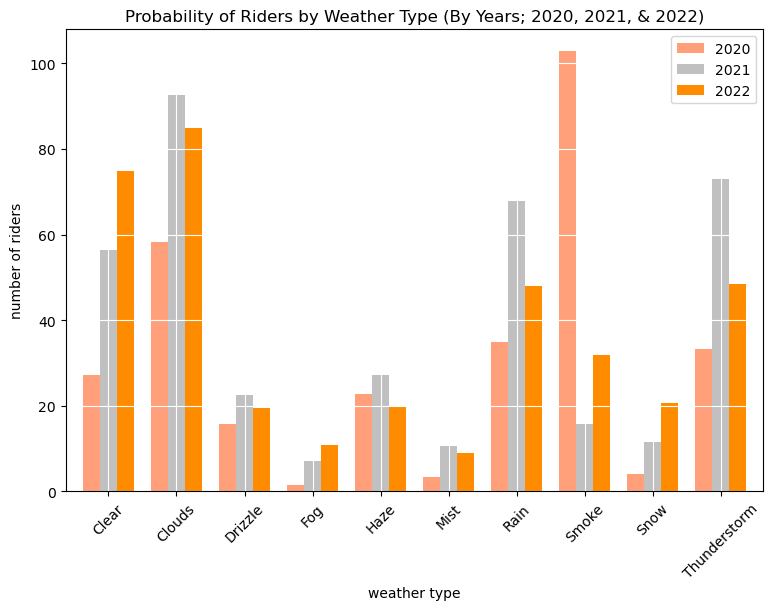

In [29]:
# Define loop Lists WITHOUT 2023

years = [2020, 2021, 2022]  
yearly_dataframes = [year_data_2020, year_data_2021, year_data_2022] 

# Create a dictionary to store probabilities for each year
data_dict = {}

# for loop plotting multiple series together

for year, year_data in zip(years, yearly_dataframes):
    data_dict[year] = rides_by_weather(year_data)

# Display the combined bar chart
display_bar(data_dict, " (By Years; 2020, 2021, & 2022)")

### Are there noticeable patterns in ridership across temperature ranges (e.g., below freezing, mild, or hot)?      (SEAN)

In [30]:
# Define temperature bins and labels

temp_bins = [-float('inf'), 0, 10, 20, 30, float('inf')]
temp_labels = ['Below Freezing', 'Cold', 'Mild', 'Warm', 'Hot']

# Add a column for temperature categories

complete_bike_weather_data['temp_category'] = pd.cut(complete_bike_weather_data['temp'], bins=temp_bins, labels=temp_labels)

complete_bike_weather_data

,ride_id,started_at,start_day,start_hour,start_hour1,start_year,trip_length,start_station_name,member_casual,rideable_type,...,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,temp_category
0,782CEA3C6968D2A6,2020-04-01 00:13:41,2020-04-01,0.0,0,2020,0 days 00:05:28,Kingsbury St & Erie St,member,docked_bike,...,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds,Cold
1,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01,0.0,0,2020,0 days 00:00:33,Wabash Ave & 9th St,member,docked_bike,...,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds,Cold
2,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01,0.0,0,2020,0 days 00:08:10,Wabash Ave & 16th St,member,docked_bike,...,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds,Cold
3,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01,0.0,0,2020,0 days 00:07:17,Mies van der Rohe Way & Chicago Ave,member,docked_bike,...,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds,Cold
4,643593E85E46A45C,2020-04-01 00:13:36,2020-04-01,0.0,0,2020,0 days 00:05:23,Kingsbury St & Erie St,member,docked_bike,...,4.02,1018,86,6.70,350,100,804,Clouds,overcast clouds,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9636880,23DF3FE6FAC4230D,2023-11-30 22:01:48,2023-11-30,23.0,22,2023,0 days 00:05:06,Clark St & Armitage Ave,casual,electric_bike,...,7.81,1012,92,4.92,183,100,500,Rain,light rain,Cold
9636881,53B0E31FD5DFCCEE,2023-11-30 22:16:03,2023-11-30,23.0,22,2023,0 days 00:22:25,Clark St & Armitage Ave,member,electric_bike,...,7.81,1012,92,4.92,183,100,500,Rain,light rain,Cold
9636882,8301A5F56705814A,2023-11-30 22:22:55,2023-11-30,23.0,22,2023,0 days 00:14:09,Wentworth Ave & Cermak Rd*,casual,electric_bike,...,7.81,1012,92,4.92,183,100,500,Rain,light rain,Cold
9636883,AE2CEF06C880E36E,2023-11-30 22:36:06,2023-11-30,23.0,22,2023,0 days 00:14:57,Wells St & Polk St,casual,electric_bike,...,7.81,1012,92,4.92,183,100,500,Rain,light rain,Cold


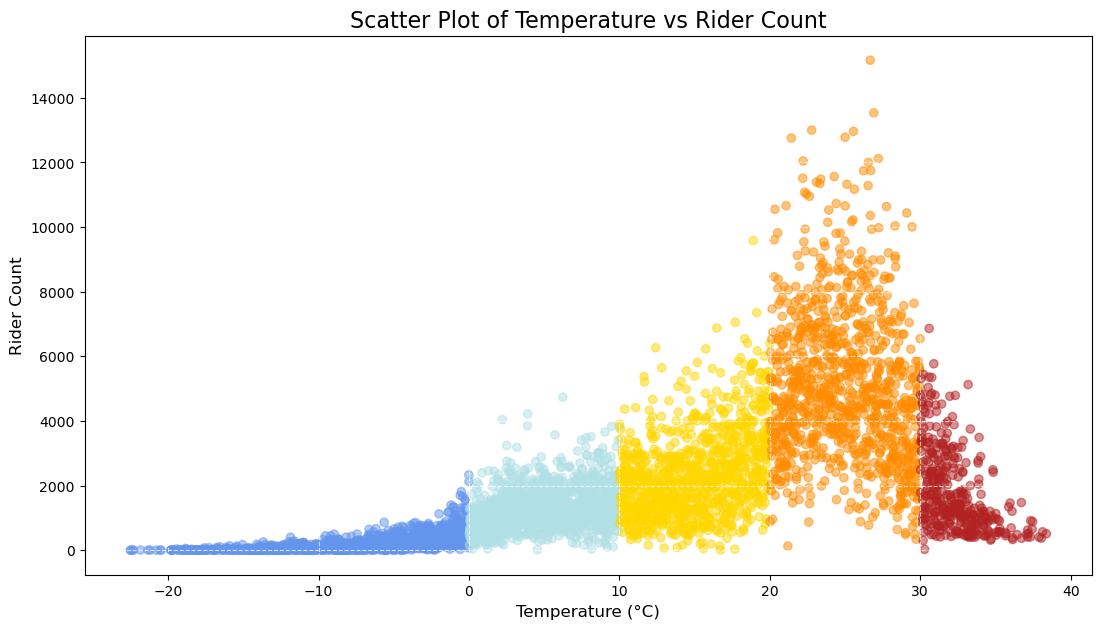

In [31]:
# Count riders by temperature and define color category

rider_count_by_temp = complete_bike_weather_data.groupby('temp').size().reset_index(name='count')

rider_count_by_temp['temp_category'] = pd.cut(rider_count_by_temp['temp'], bins=temp_bins, labels=temp_labels)

# Create Color Map and add it to the working data frame

temp_color_map = {
    'Below Freezing': 'cornflowerblue',
    'Cold': 'powderblue',
    'Mild': 'gold',
    'Warm': 'darkorange',
    'Hot': 'firebrick'
}

rider_count_by_temp['color'] = rider_count_by_temp['temp_category'].map(temp_color_map)

# Create a Scatter plot of Rider Count by temperature

plt.figure(figsize=(13, 7))
plt.scatter(rider_count_by_temp['temp'], rider_count_by_temp['count'], color=rider_count_by_temp['color'], alpha=0.5)

# Scatter Plot Formatting

plt.title('Scatter Plot of Temperature vs Rider Count', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rider Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# show plot and save the fig

plt.savefig('../output/Scatter Plot of Temperature vs Rider Count')

plt.show()


## Most Used Rideable Types by Year (Lovecy)

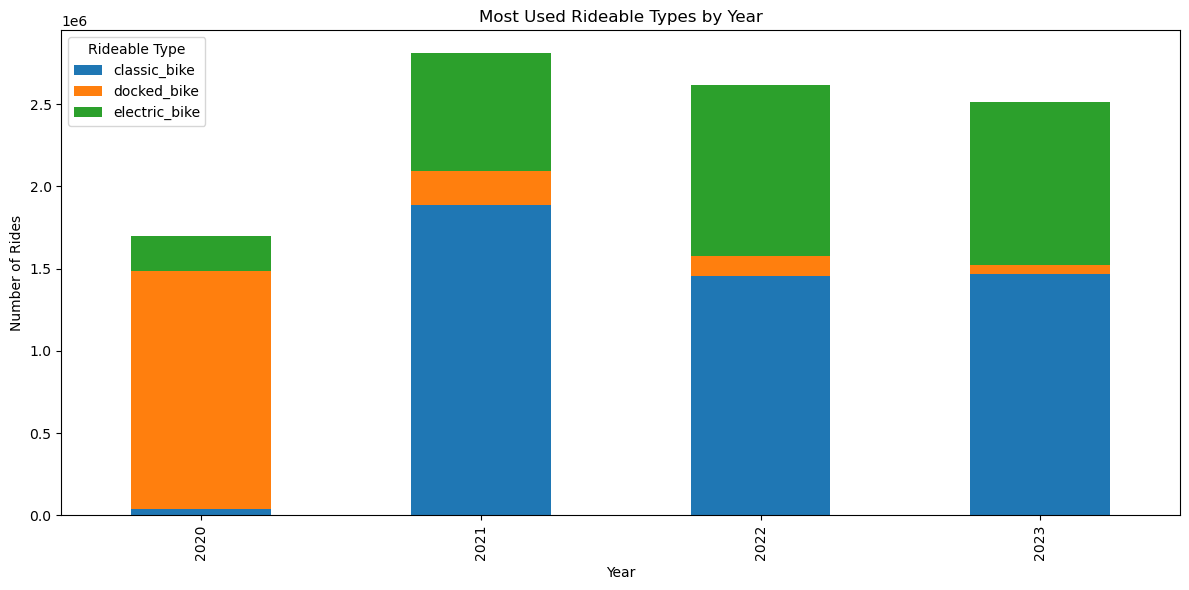

In [32]:
# Group by year and rideable type
rideable_counts = complete_bike_weather_data.groupby(['start_year', 'rideable_type']).size().reset_index(name='count')

# Pivot the data for better visualization
rideable_pivot = rideable_counts.pivot(index='start_year', columns='rideable_type', values='count')

# Plot the data
rideable_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Most Used Rideable Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()

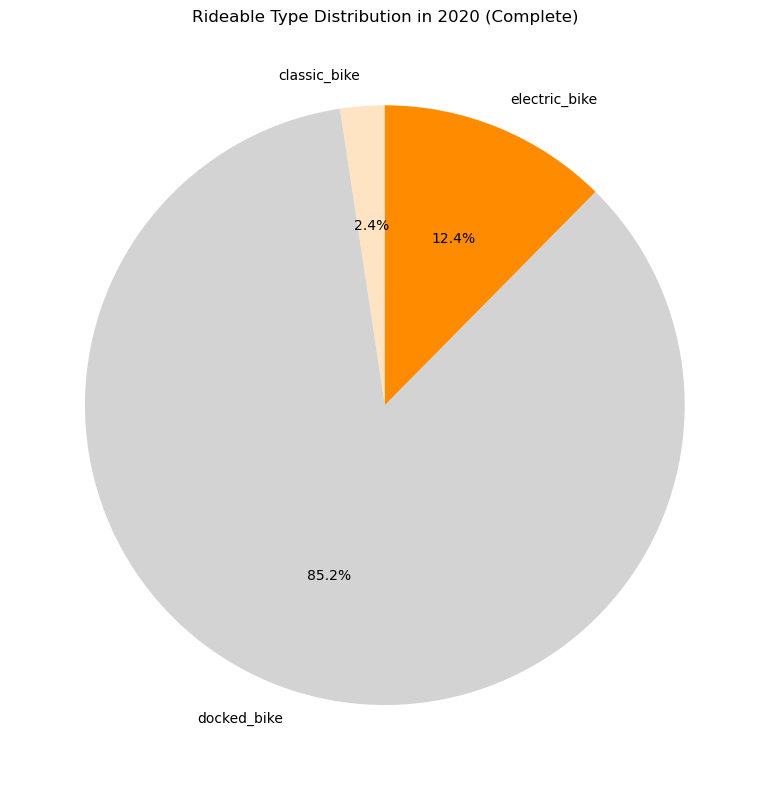

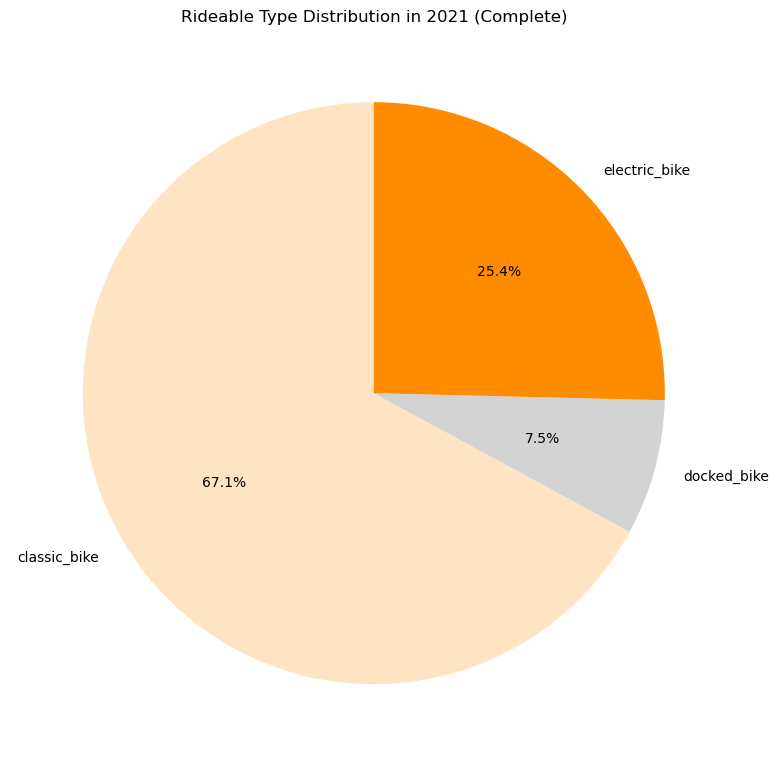

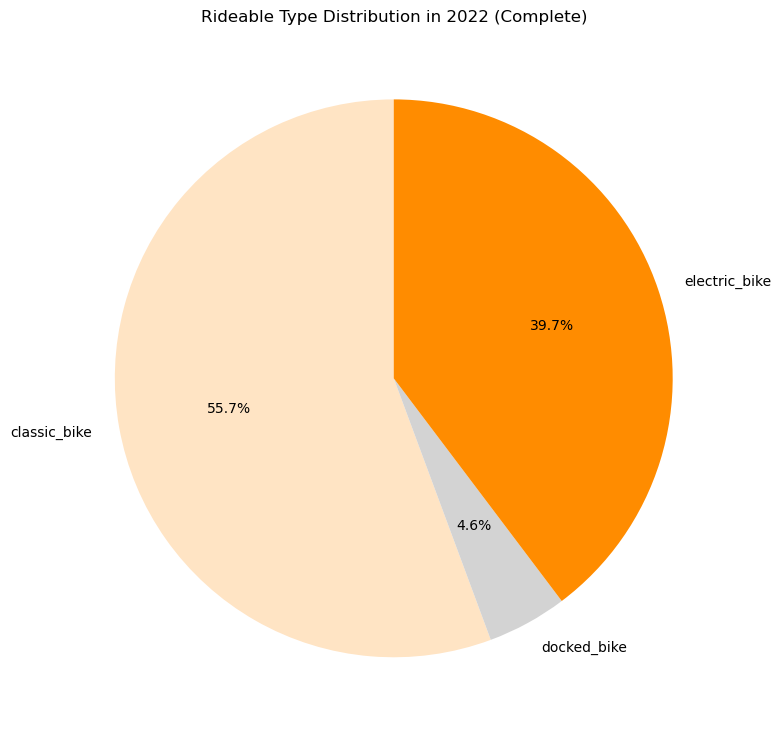

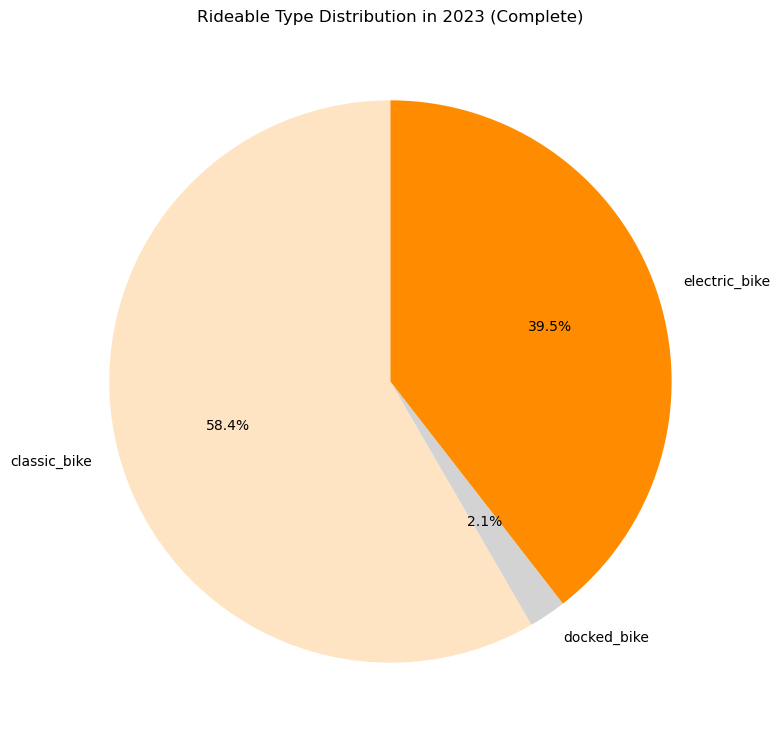

In [33]:
# Define function

def plot_rideable_type_distribution(data, user_type):

    # Group by year and rideable type
    rideable_counts = data.groupby(['start_year', 'rideable_type']).size().reset_index(name='count')

    # Pivot the data for easier processing
    rideable_pivot = rideable_counts.pivot(index='start_year', columns='rideable_type', values='count')

    # Plot pie charts for each year
    for year in rideable_pivot.index:
        plt.figure(figsize=(8, 8))
        rideable_pivot.loc[year].plot(
            kind='pie', 
            autopct='%1.1f%%', 
            startangle=90, 
            labels=rideable_pivot.columns,
            colors=['bisque', 'lightgrey', 'darkorange']
        )
        plt.title(f'Rideable Type Distribution in {year} {user_type}')
        plt.ylabel('')
        plt.tight_layout()
        plt.savefig(f'../output/Rideable Type Distribution {user_type} {year}.png')
        plt.show()


plot_rideable_type_distribution(complete_bike_weather_data, '(Complete)')


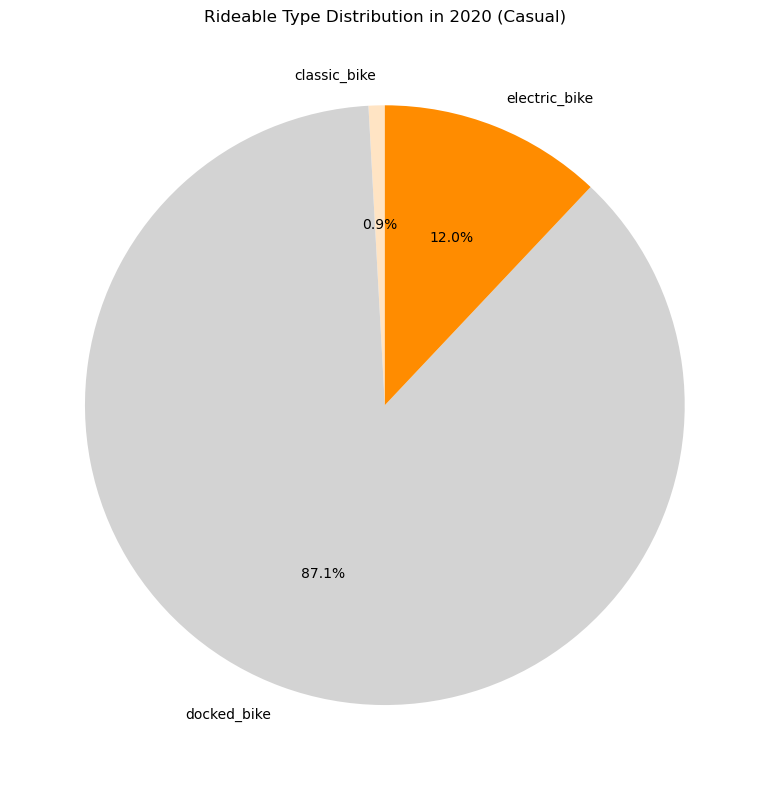

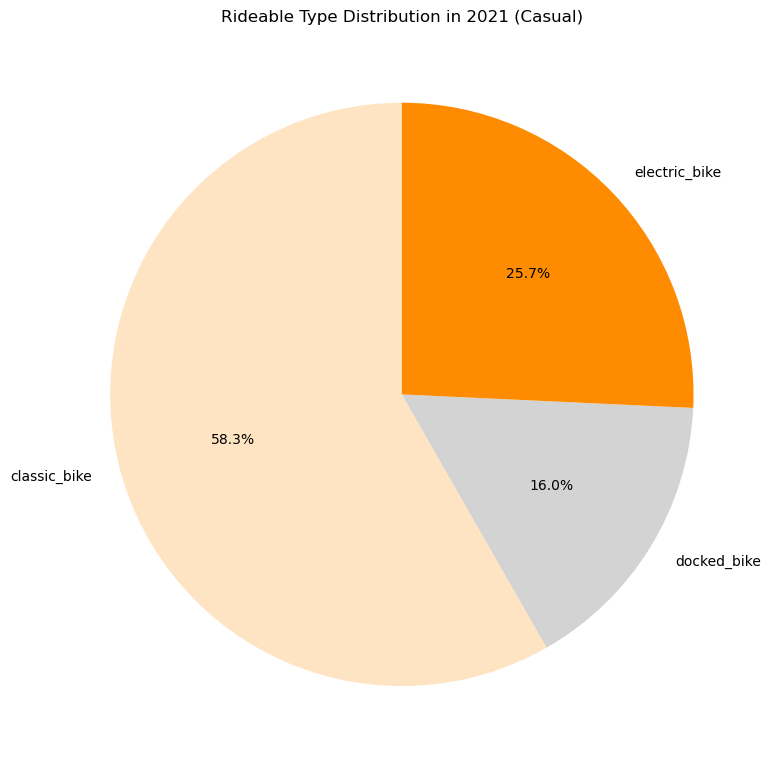

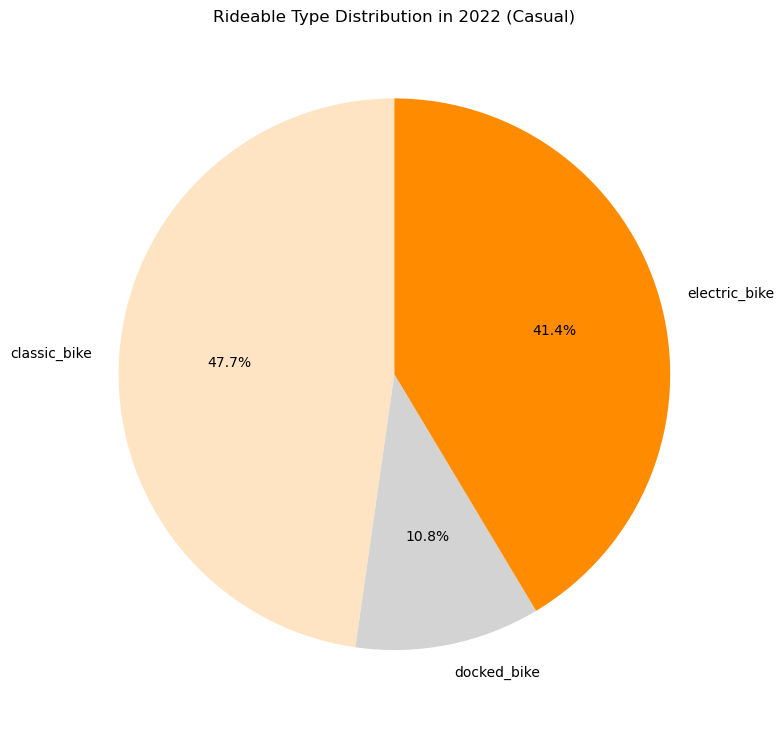

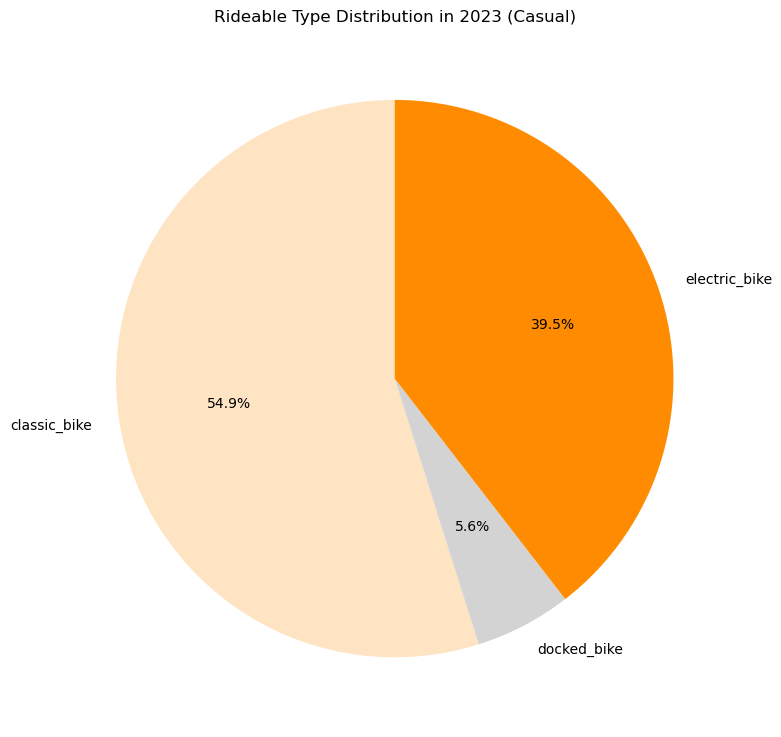

In [34]:
# Split Data by User Type Casual and run rideable type distribution function

casual_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'casual', :]
member_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'member', :]

plot_rideable_type_distribution(casual_user_complete, '(Casual)')

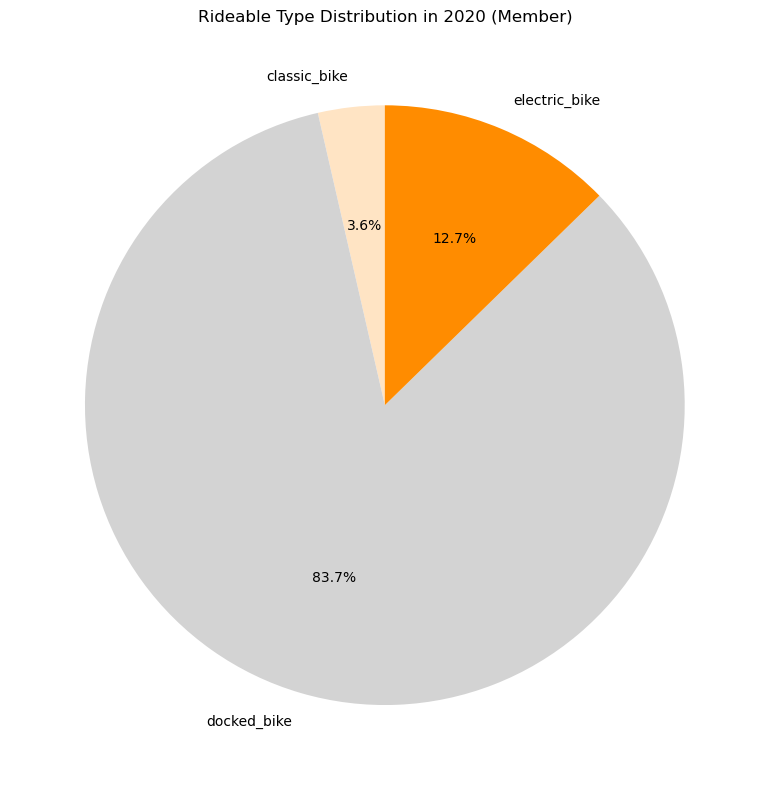

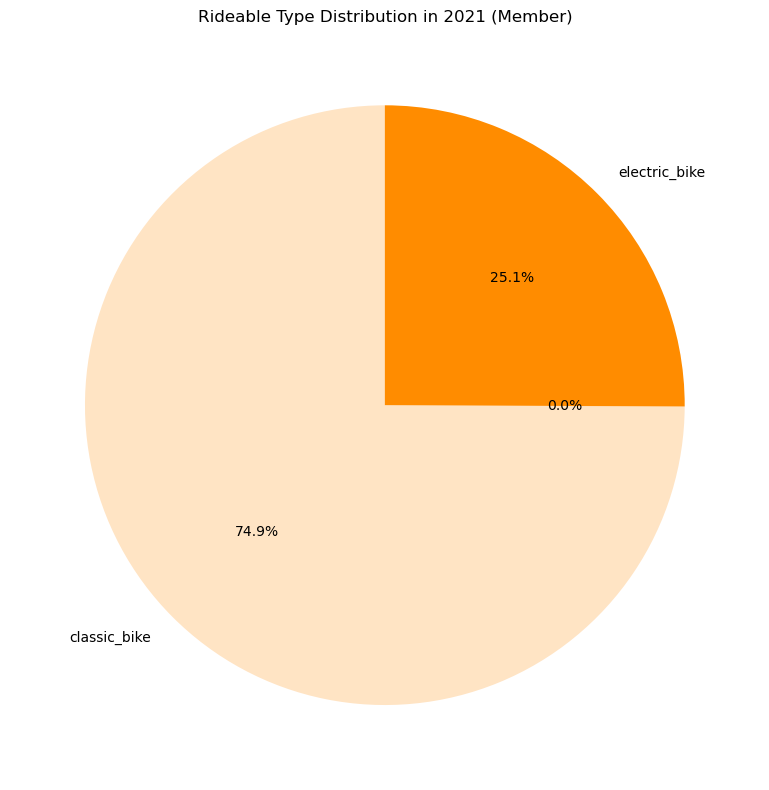

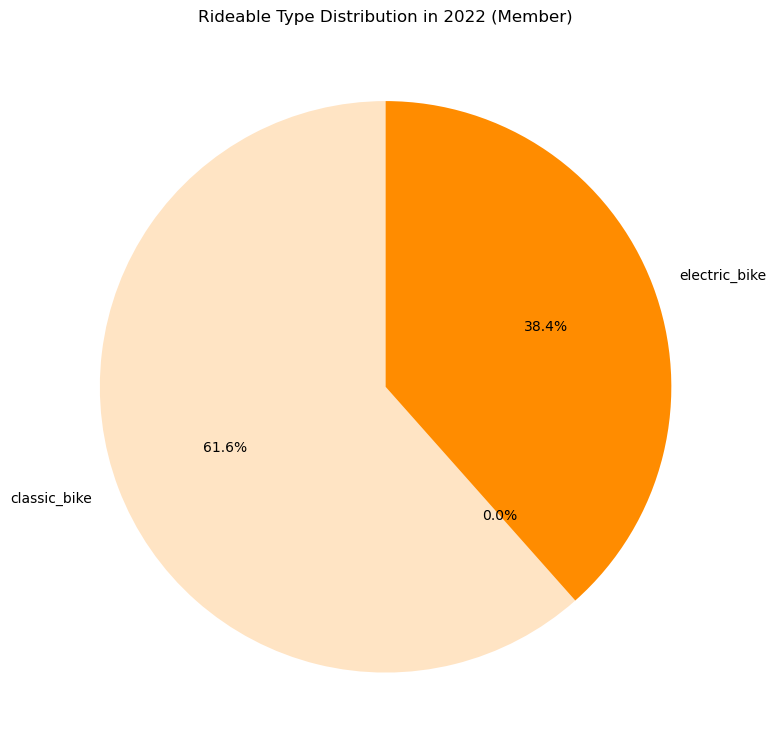

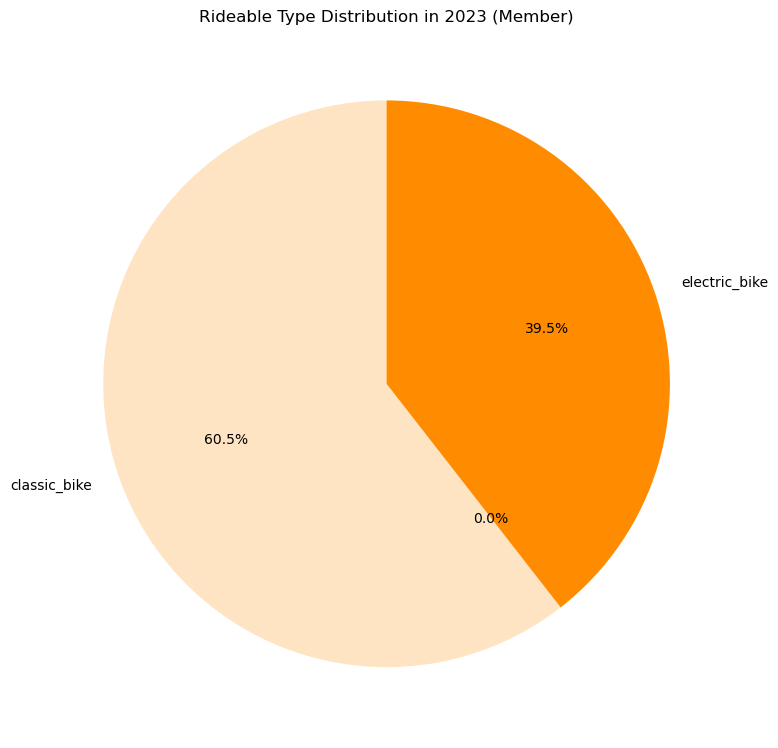

In [35]:
# Split Data by User Type Member and run rideable type distribution function

member_user_complete = complete_bike_weather_data.loc[complete_bike_weather_data['member_casual'] == 'member', :]

plot_rideable_type_distribution(member_user_complete, '(Member)')

## Average Hourly Rides by Weather Condition (Jitesh)

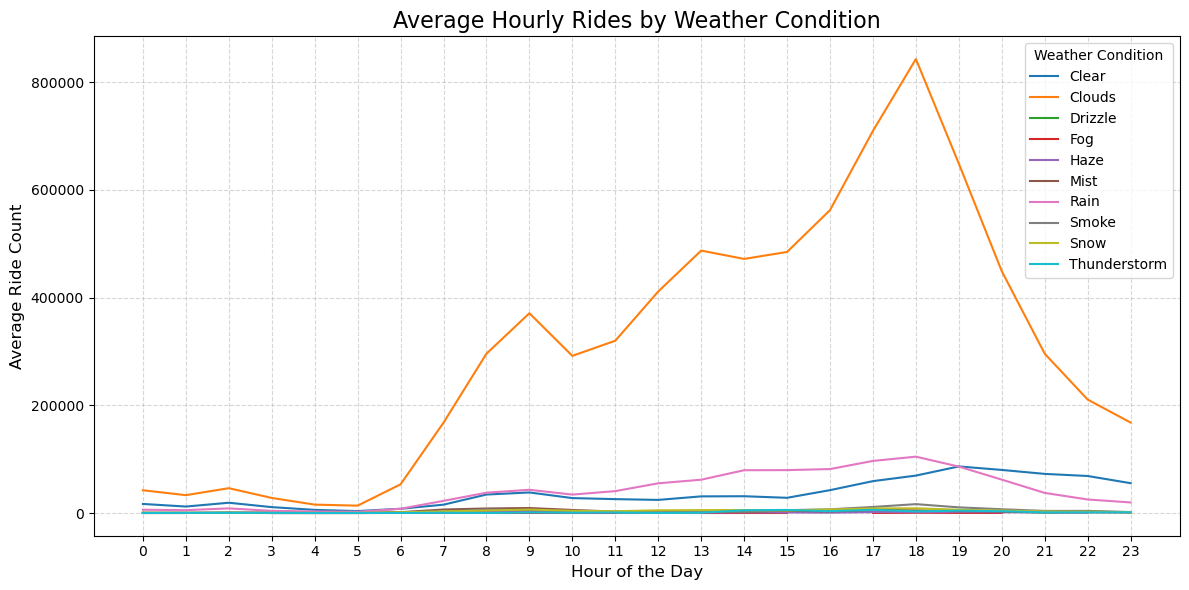

In [36]:
# Group data by 'start_hour' and 'weather_main', then calculate the average rides
hourly_weather = complete_bike_weather_data.groupby(['start_hour', 'weather_main']).agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
hourly_weather.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Pivot the data for plotting          
pivot_data = hourly_weather.pivot(index='start_hour', columns='weather_main', values='ride_count')

# Plot the line chart
plt.figure(figsize=(12, 6))
for weather in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[weather], label=weather)

# Adding labels, title, and legend
plt.title('Average Hourly Rides by Weather Condition', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0, 24))  # Show all hours
plt.legend(title="Weather Condition")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

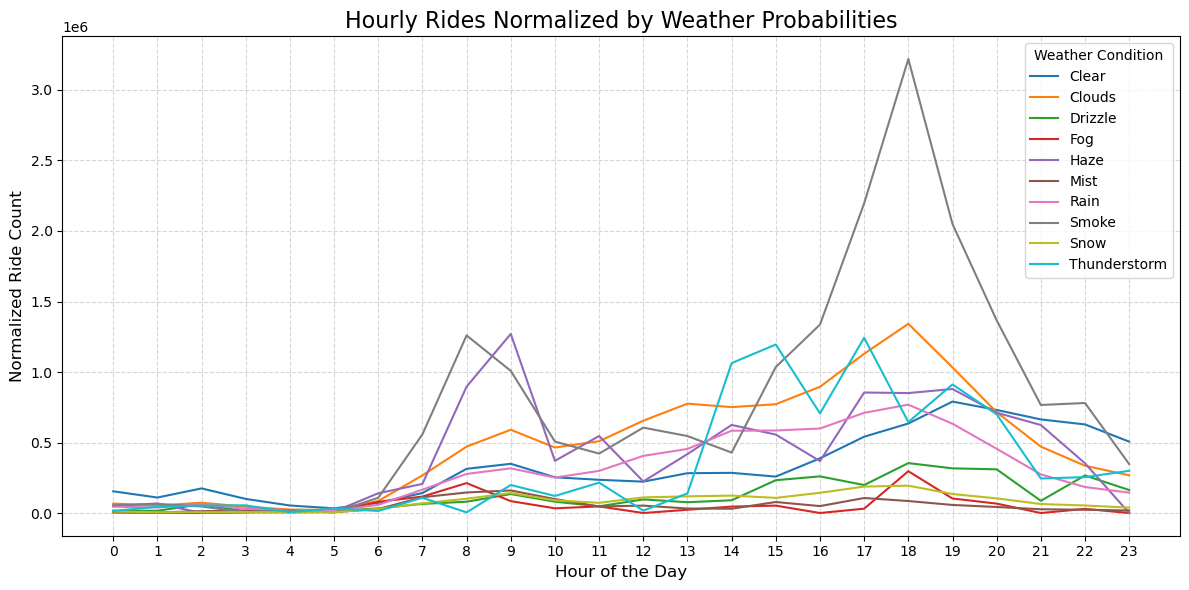

In [37]:
# Calculate probabilities of each weather type
weather_probs = weather_data['weather_main'].value_counts(normalize=True)

# Map probabilities back to the dataset
complete_bike_weather_data['weather_prob'] = complete_bike_weather_data['weather_main'].map(weather_probs)

# Fill missing probabilities with a small value to avoid division errors
complete_bike_weather_data['weather_prob'] = complete_bike_weather_data['weather_prob'].fillna(1e-6)

# Group by 'start_hour' and 'weather_main', and calculate total ride counts
hourly_weather = complete_bike_weather_data.groupby(['start_hour', 'weather_main']).size().reset_index(name='ride_count')

# Normalize ride counts by weather probabilities
hourly_weather['normalized_ride_count'] = hourly_weather['ride_count'] / hourly_weather['weather_main'].map(weather_probs)

# Fill missing values in the normalized ride counts with 0
hourly_weather['normalized_ride_count'] = hourly_weather['normalized_ride_count'].fillna(0)

# Pivot the data for plotting          
pivot_data = hourly_weather.pivot(index='start_hour', columns='weather_main', values='normalized_ride_count').fillna(0)

# Plot each line in the data in a For loop
plt.figure(figsize=(12, 6))
for weather in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[weather], label=weather)

# Adding labels, title, and legend
plt.title('Hourly Rides Normalized by Weather Probabilities', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Normalized Ride Count', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title="Weather Condition")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Hourly Rides Normalized by Weather Probabilities')

plt.show()


## Monthly Ride Volume (Jitesh)

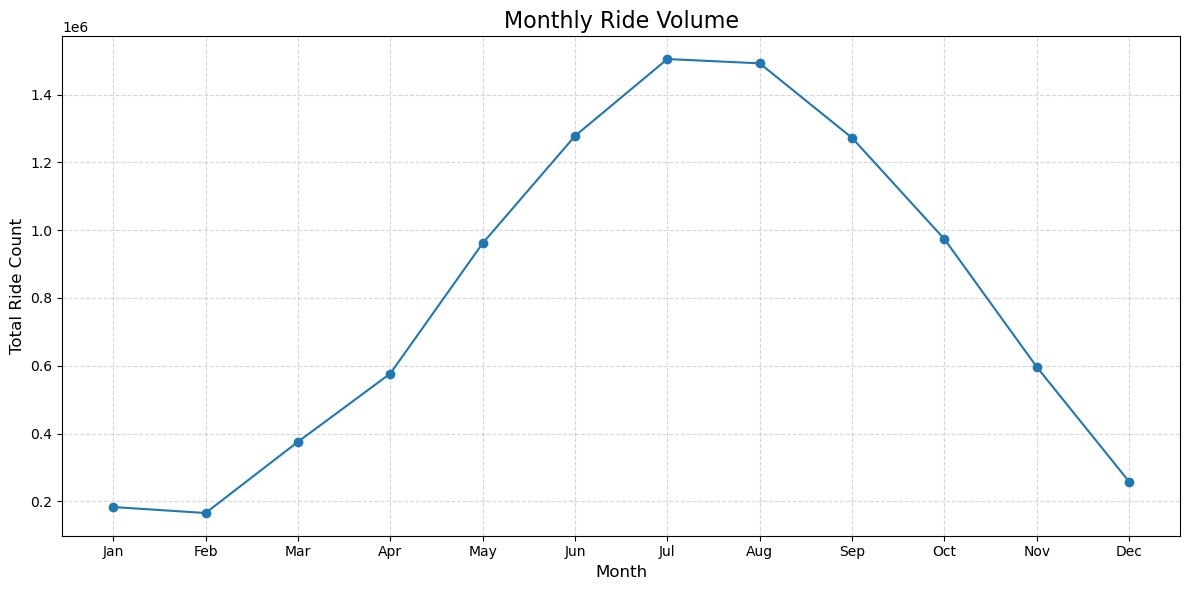

In [38]:

# Convert 'start_day' to datetime if it's not already
complete_bike_weather_data['start_day'] = pd.to_datetime(complete_bike_weather_data['start_day'])

# Extract the month from the 'start_day' column
complete_bike_weather_data['start_month'] = complete_bike_weather_data['start_day'].dt.month

# Group by 'start_month' and sum the ride counts (using 'ride_id')
monthly_ride_volume = complete_bike_weather_data.groupby('start_month').agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
monthly_ride_volume.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_ride_volume['start_month'], monthly_ride_volume['ride_count'], marker='o')

# Adding labels, title, and grid
plt.title('Monthly Ride Volume', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ride Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

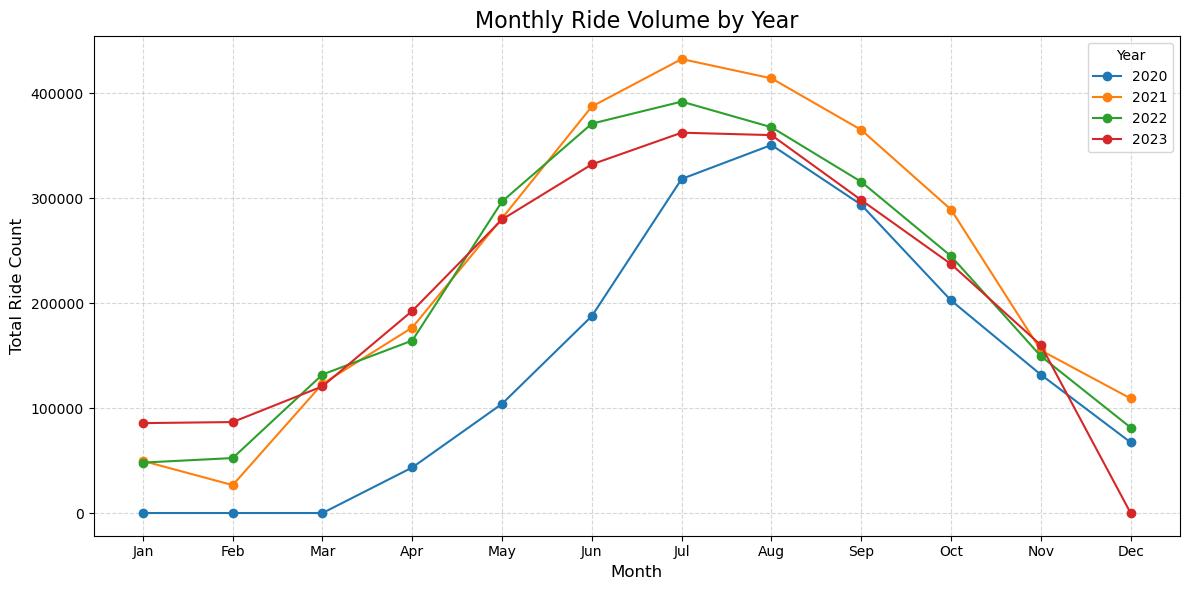

In [39]:
# Group by 'start_year' and 'start_month' and count rides
monthly_ride_volume = complete_bike_weather_data.groupby(['start_year', 'start_month']).agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
monthly_ride_volume.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Pivot the data for easier plotting (years as columns, months as rows)
pivot_data = monthly_ride_volume.pivot(index='start_month', columns='start_year', values='ride_count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
for year in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[year], label=year, marker='o')

# Adding labels, title, and grid
plt.title('Monthly Ride Volume by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ride Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Monthly Ride Volume by Year')

plt.show()

## Top 10 Stations Under Clear and Adverse Weather (Jitesh)

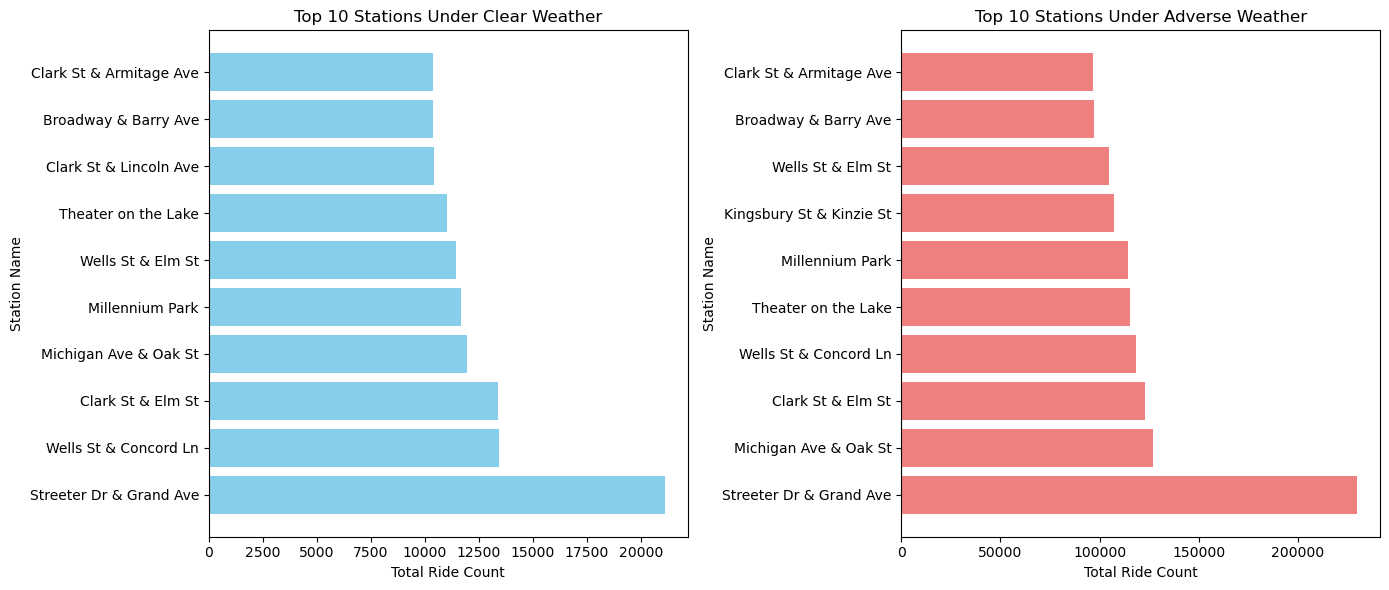

In [40]:
# Filter data into "clear" and "adverse" weather conditions
clear_weather = complete_bike_weather_data[complete_bike_weather_data['weather_main'] == 'Clear']
adverse_weather = complete_bike_weather_data[~complete_bike_weather_data['weather_main'].isin(['Clear'])]

# Group by station name and calculate the total ride count
clear_station_activity = clear_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()
adverse_station_activity = adverse_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()

# Sort the stations by ride count in descending order and take the top 10
top_10_clear_stations = clear_station_activity.sort_values(by='ride_id', ascending=False).head(10)
top_10_adverse_stations = adverse_station_activity.sort_values(by='ride_id', ascending=False).head(10)

# Plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Clear Weather
axes[0].barh(top_10_clear_stations['start_station_name'], top_10_clear_stations['ride_id'], color='skyblue')
axes[0].set_title('Top 10 Stations Under Clear Weather')
axes[0].set_xlabel('Total Ride Count')
axes[0].set_ylabel('Station Name')

# Plot for Adverse Weather
axes[1].barh(top_10_adverse_stations['start_station_name'], top_10_adverse_stations['ride_id'], color='lightcoral')
axes[1].set_title('Top 10 Stations Under Adverse Weather')
axes[1].set_xlabel('Total Ride Count')
axes[1].set_ylabel('Station Name')

# Adjust layout
plt.tight_layout()

# Show the plot and save the fig

plt.savefig(f'../output/Top 10 Stations Under Clear and Adverse Weather')

plt.show()

## Rider Type Breakdown by Weather Condition (Normalized) (Jitesh)

<Figure size 1000x600 with 0 Axes>

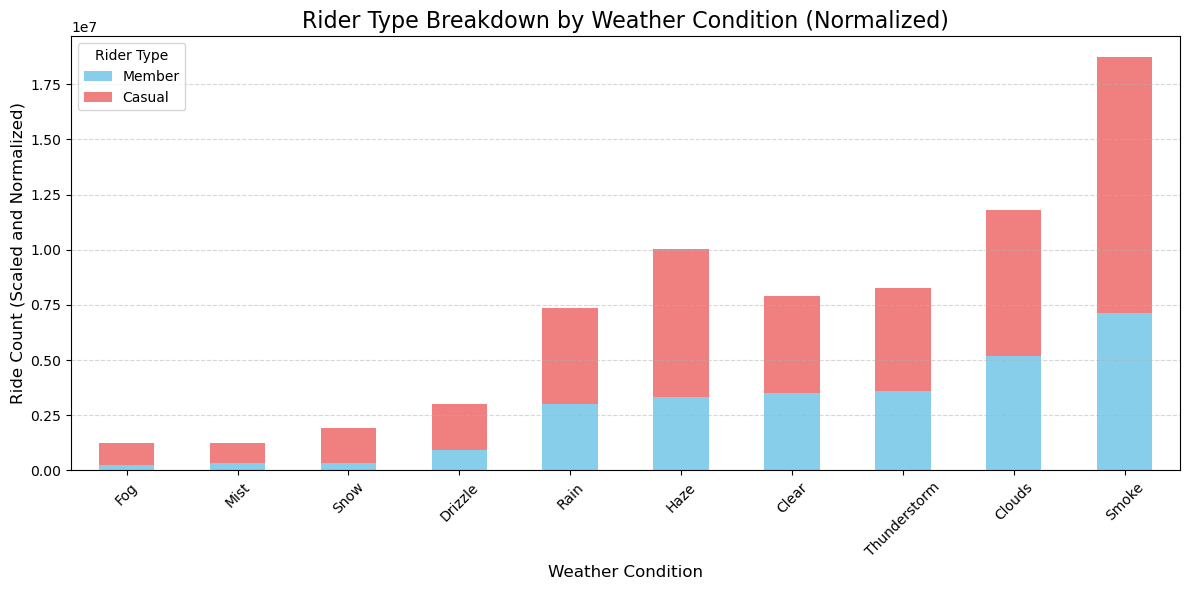

In [41]:
# Group data by 'weather_main' and 'member_casual', then count the rides
rider_type_by_weather = complete_bike_weather_data.groupby(['weather_main', 'member_casual']).agg({'ride_id': 'count'}).reset_index()

# Normalize the ride counts by weather probabilities
rider_type_by_weather['normalized_ride_count'] = rider_type_by_weather['ride_id'] / rider_type_by_weather['weather_main'].map(weather_probs)

# Fill missing values in the normalized ride counts with 0
rider_type_by_weather['normalized_ride_count'] = rider_type_by_weather['normalized_ride_count'].fillna(0)

# Pivot the normalized data so that 'member_casual' values become columns and sort it
pivot_rider_type = rider_type_by_weather.pivot(index='weather_main', columns='member_casual', values='normalized_ride_count')
pivot_rider_type = pivot_rider_type.sort_values(['casual', 'member'])

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_rider_type.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(12, 6))

# Adding labels, title, and legend
plt.title('Rider Type Breakdown by Weather Condition (Normalized)', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Ride Count (Scaled and Normalized)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rider Type', labels=['Member', 'Casual'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot and save fig
plt.tight_layout()

plt.savefig(f'../output/Rider Type Breakdown by Weather Condition (Normalized)')

plt.show()

## Hourly Ride Trends by Rider Type and Bike Type (Jitesh)

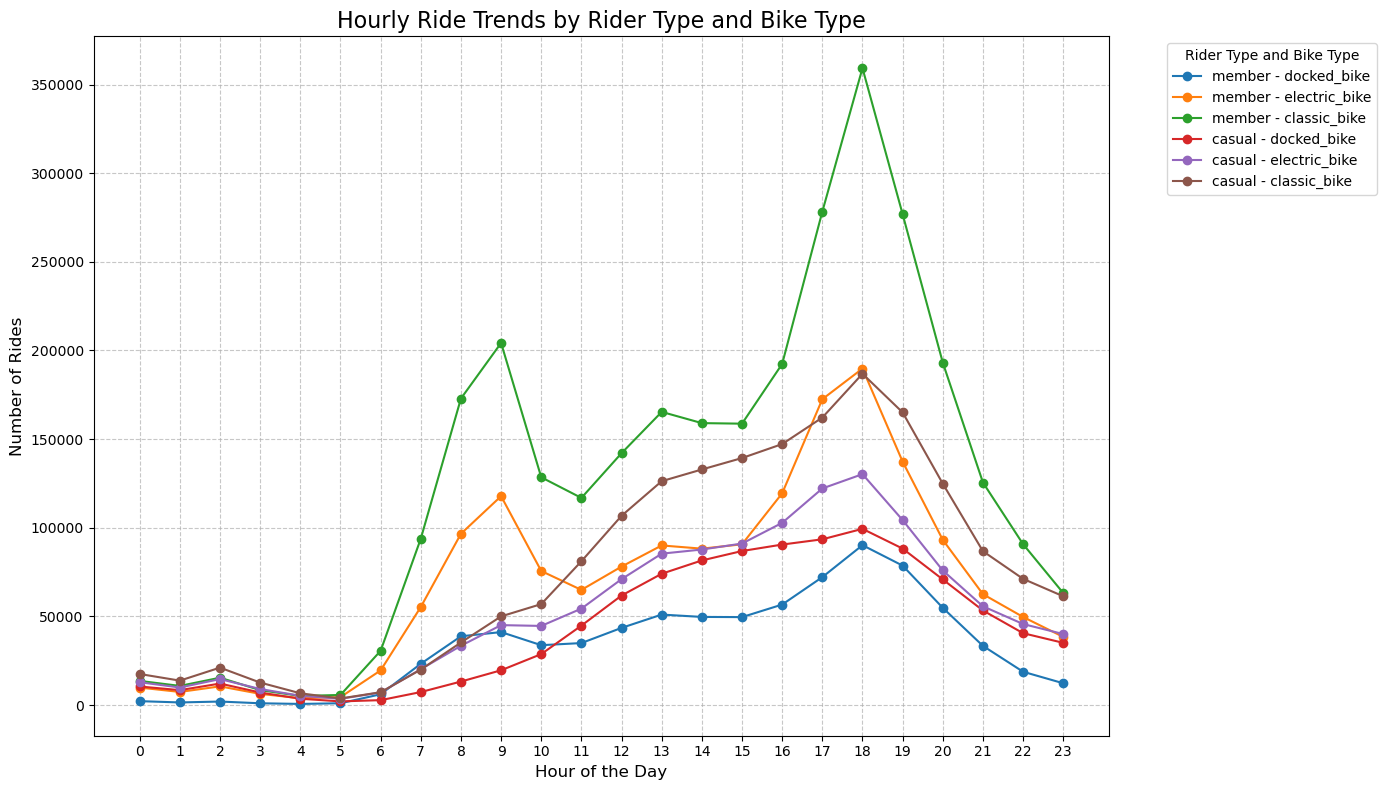

In [42]:
# Group by start_hour, member_casual, and rideable_type to get ride counts
hourly_trends = complete_bike_weather_data.groupby(['start_hour', 'member_casual', 'rideable_type']).size().reset_index(name='ride_count')

# Pivot data to have start_hour as index and columns for member_casual and rideable_type
pivot_data = hourly_trends.pivot_table(index='start_hour', columns=['member_casual', 'rideable_type'], values='ride_count', aggfunc='sum').fillna(0)

# Plotting the line chart
plt.figure(figsize=(14, 8))

# Plot trends for each rider type and rideable type
for rider_type in ['member', 'casual']:
    for rideable in complete_bike_weather_data['rideable_type'].unique():
        column_name = (rider_type, rideable)
        
        if column_name in pivot_data.columns:
            plt.plot(pivot_data.index, pivot_data[column_name], label=f'{rider_type} - {rideable}', marker='o')

# Add labels, title, and legend
plt.title('Hourly Ride Trends by Rider Type and Bike Type', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(range(0, 24))  # Assuming start_hour is in 24-hour format
plt.legend(title='Rider Type and Bike Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot with tight layout and save fig
plt.tight_layout()

plt.savefig(f'../output/Hourly Ride Trends by Rider Type and Bike Type')

plt.show()